In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

un = pd.read_csv("/content/drive/MyDrive/UN/un-general-debates.csv")

In [6]:
import regex as re
import nltk
def tokensize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*',text)

nltk.download("all")


[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package city_database to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/city_database.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package comparative_sentences to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/comparative_sentences.zip.
[nltk_data]    | Downloading package comtrans to /root/nltk_data...
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [8]:
stopwords = set(nltk.corpus.stopwords.words('english'))

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [9]:
pipeline = [str.lower,tokensize,remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [10]:
un['tokens'] = un['text'].apply(prepare, pipeline=pipeline)
un['num_tokens'] = un['tokens'].map(len)                          

---

# 단어 빈도 분석을 위한 전략

>논의 주제에서 자주 사용하는 단어와 구를 보면 기본적인 내용을 이해하지만 단어 빈도 분석은 단어의 순서와 문맥을 무시하므로 모든 단어를 가방에 넣어서 돌아다닌 후 내용물을 봤을 때 섞인 상태이다.

<br>

실제로, 텍스트의 원래 배열은 손실되고ㅡ 용어의 빈도만 고려하는 단어 가방 모델(bag of words model)의 아이디어이다.

이 모델은 감정 분석이나 질의 응답 같은 task에선 작동하지 않지만, 분류 및 토픽 모델링에선 놀라울 정도로 작동을 잘하고 텍스트의 모든 내용을 이해하기에 좋은 출발점이다.

그래서, 이번엔 단어 빈도를 계산하고 시각화하는 전략을 통해서 빈번하게 등장하는 단어를 제외하면 절대 빈도 값이 중요하지 않으므로 파이프라인의 마지막에선 TF-IDF 도입해서 간단하고 매우 빠른 Counter를 사용해서 빈도 계산을 구현하겠다.

## 전략: 파이썬 Counter 클래스를 이용한 단어 계수

>파이썬의 표준 라이브러리에는 Counter 클래스로 이름 그대로 객체의 수를 세고, Counter 클래스를 가장 쉽게 사용하는 방법은 측정하려는 항목을 리스트로 만드는 것이고, 지금 측정하려는 항목은 단어 혹은 토큰이고, Counter 클래스의 실행 결과는 기본적으로 해당 항목을 키로, 빈도를 값으로 포함한 사전 객체다.





In [11]:
from collections import Counter

tokens = tokensize("She likes my cats and my cats like my sofa.")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [12]:
"""
Counter 클래스의 입력은 파이썬 리스트가 필요하고 모든 텍스트를 미리 토큰화한다.
Counter 클래스의 좋은 점은 두 번째 문서의 토큰 목록을 추가로 업데이트할 수 있다.
"""

more_tokens = tokensize("She likes dogs and cats.")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


말뭉치에서 가장 많이 나온 단어를 찾을 시 모든 문서의 모든 단어 목록에서 Counter를 만드는 것으로 간단한 방법으로 모든 문서를 하나의 거대한 토큰 목록으로 연결하는 것이 좋아보이지만 실제로 큰 데이터셋에선 안될 수도 있다.

In [ ]:
"""
각각의 단일 문서에 대해 Counter 객체의 업데이트 기능을 호출하는 것이 훨씬 더 효율적이다.
"""

counter = Counter()

un['tokens'].map(counter.update)

**비법: map 함수 안에 counter.update를 실행**

update 함수 내부에서 마법이 일어난다.

>map함수 호출은 전체 데이터를 빠르게 실행되고, 일반적으로 파이썬의 dict 타입과 Counter 클래스가 해시 테이블로 구현되기 때문에 Counter에는 고유 단어의 그 단어의 발생 빈도가 저장되어 있어서 전체 말뭉치에 비해 매우 간결하다.



In [14]:
#counter의 most_common함수를 사용해서 텍스트에서 가장 빈번하게 나오는 단어 검색
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


In [22]:
"""
자세하게 추가 처리 및 분석을 위해선 Counter 클래스를 팬더스 데이터프레임으로 변환하는 것이 훨씬 더 편하다
토큰은 데이터프레임의 인덱스가 되고, 빈도값은 freq라는 열에 저장되고, 가장 자주 사용되는 단어가 행의 첫 부분에 표시되도록 정렬된다.
"""

"""
판다스의 데이터프레임을 첫 번째 매개변수로 사용하고, 토큰 혹은 텍스트를 포함한 열 이름을 두 번째 매개변수로 사용한다.

데이터프레임의 토큰 열에 연설을 토큰화한 토큰이 저장
"""
def count_words(df, column="tokens", preprocess=None, min_freq=2):

    #토큰들을 처리하고 counter를 업데이트한다.
    def update(doc):
        tokens =doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

        #counter를 생성하고, 모든 데이터에 대해 update를 실행한다.
    counter = Counter()
    df[column].map(update)

        #counter를 DataFrame화
    freq_df = pd.DataFrame.from_dict(counter, orient="index",columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq') #빈도수가 최솟값(0) 이상인 것들을 뽑아라
    freq_df.index.name = 'token'
    return freq_df.sort_values("freq", ascending=False)

In [23]:
# 코드를 사용해서 단어 빈도로 데이터프레임을 계산하여 상위5개 토큰 표시
freq_df = count_words(un)
freq_df.head(5)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [32]:
"""
특별한 분석을 위해서 미리 계산된 토큰을 사용할 필요가 없다면, 세 번째 매개변수로
사용자 지정 전처리 함수를 사용해 텍스트를 즉석에서 토큰화할 수 있고, 단어 빈도를 계산하기 직전에 텍스트에 대한 토큰화를 바로 진행
10자 이상의 단어를 모두 찾고 빈도 수 계산
"""

#count_words의 마지막 매개 변수는 결과에 포함될 토큰의 최소 빈도를 정의하고 한 번만 나타난 토큰을 없애기 위해서 기본값 2설정
count_words(un, column="text",
            preprocess=lambda text: re.findall(r"\w{10,}",text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
Overzealous,1
anthropologists,1
consignees,1


---



## 빈도 다이어그램 생성

>파이썬으로 테이블과 다이어그램을 그리는 방법은 수십 가지이고, 그중 판다스는 플롯 기능이 내장되어서 일반 matplotlib보다 더 쉽게 사용하고 많은 사람이 선호하고, 시각화를 위해서 이전에 생성한 데이터프레임 freq_df을 사용하고, 데이터프레임을 기반으로 빈도 다이어그램을 그리고 시각화하는 코드는 한 줄로 가능하다.



[Text(0, 0.5, 'Token'), Text(0.5, 0, 'Frequency'), Text(0.5, 1.0, 'Top Words')]

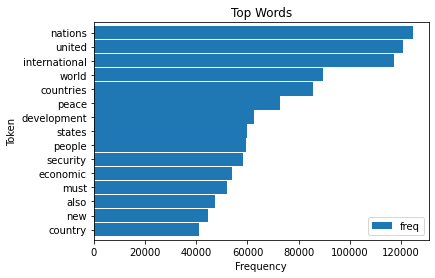

In [34]:
#서식지정을 위한 코드 및 시각화

"""
단어 빈도를 가로 막대로 표시할 시, 단어를 읽을 수 있는 형태로 표시할 수 있게 되어서 가독성이 크게 향상된다.

차트의 맨 위에 상위 단어를 배치하여 각 축의 레이블과 제목은 상황에 맞게 수정할 수 있다.
"""
ax = freq_df.head(15).plot(kind="barh", width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency',ylabel="Token",title="Top Words")

---

## 워드 클라우드 생성

>시차, 범주, 작성자 등은 워드 클라우드를 활용하여 다양한 글꼴크기로 빈도를 시각화하고 내용을 이해하고 비교하기가 훨씬 쉬우므로 표와 막대 차트처럼 정밀하진 못한다.

**긴 단어나 대문자가 포함된 단어가 상대적으로 더 높은 관심을 받는다**

In [ ]:
un

(-0.5, 399.5, 199.5, -0.5)

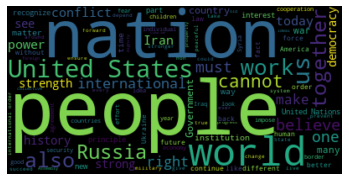

In [39]:
"""
최대 단어 수 및 불용어 목록같은 몇 가지 옵션을 사용해서 워드 클라우드 객체를 인스턴스화
wordcloud 모듈이 토큰화 및 불용어 제거를 처리하여 결과 이미지를 표시한다.
"""

from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = un.query("year==2015 and country=='USA'")['text'].values[0]
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

"""
단일 텍스트에서만 작동하고, 더 큰 데이터셋을 이용할 땐 빈도 counter를 먼저 생성한 후
generate_from_frequencies()함수를 사용하기
"""

In [40]:
"""
count_words에 의해 생성된 빈도값을 포함하는 판다스의 시리즈도 지원하도록
함수를 둘러싼 작은 래퍼를 준비하였고, WordCloud클래스에는 결과를 미세 조정할 수 있는 옵션이 존재하여,
이 중 일부를 사용해서 결과를 조정한다.
"""

"""
아래 함수는 단어를 필터링하는 편의 매개 변수가 두 개가 있는데 skip_n은 목록의 상위 n개 단어를 건너뛴다.

유엔 말뭉치에는 분명 united, Nations, Interational같은 단어가 빈도 목록의 앞에 나와서
나열된 단어를 시각화하는 것이 더 흥미롭다.

두 번째 필터는 불용어를 추가한 목록으로 자주 사용되지만 시각화를 위해 흥미롭지 않은 특정 단어를 필터링 하는 것이 도움이 된다.
"""

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400,
                   background_color="black", colormap="Paired",
                   max_font_size=150, max_words=max_words)
    
    #데이터프레임을 사전형으로 변경한다.
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    #빈도 counter에서 불용어를 필터링한다.
    if stopwords is not None:
        counter = {token:freq for (token,freq) in counter.items()
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)

    plt.title(title)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")


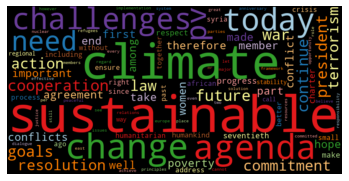

In [41]:
"""
말뭉치에서 가장 많이 등장한 단어를 제외한 것은 주제의 분석에 유용하지만 의미를 명확하게 파악하기 어렵다.
위와 같은 문제를 완화하기 위해선 빈번하게 등장한 단어의 가중치를 줄이는 방법이 필요하다.
"""
freq_2015_df = count_words(un[un['year']==2015])
plt.figure()
wordcloud(freq_2015_df['freq'], max_words=100)
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)

---


## TF-IDF를 사용한 순위 지정

>일반적으로 가장 많이 사용된 단어를 시각화하면 통창을 얻기 어려우므로 불용어가 제거되더라도 대부분의 문서에 공통으로 등장하는 단어는 해당 영역에 많이 쓰는 용어로 주제나 분류 그리고 말뭉치의 하위 집합을 잡기가 용이하다.


<br>

개별 데이터의 단어 빈도가 전체 데이터의 단어 빈도보다 더 높은 단어를 강조해 표시하려고하는데 가장 간단하지만 효과적인 것은 문서 빈도를 역 문서 빈도(IDF)로 보완하는 것이다.

In [42]:
"""
count_words와 거의 동일하지만, 각 토큰이 문서당 한 번만 계산 (counter.update(set(tokens)))된다.

IDF값이 용어의 총 개수를 계산한 후에 계산되므로 매개변수 mid_df는 사용빈도가 낮은 롱테일에 대한 필터 역할을 한다.

아래의 함수는 데이터프레임을 반환한다.
"""

def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    #토큰 개수를 얻는다.
    counter = Counter()
    df[column].map(update)

    #데이터프레임 생성 후 idf를 계산한다.

    idf_df = pd.DataFrame.from_dict(counter, orient='index',columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df']) + 0.1
    idf_df.index.name = 'token'
    return idf_df

IDF값은 전체 말뭉치에 대해 한 번만 계산해야 하고, 모든 종류의 분석에 사용할 수 있으므로 이 함수를 사용해서 각 토큰(idf_df)에 대한 IDF값이 있는 데이터프레임을 만든다.

In [ ]:
idf_df = compute_idf(un)

In [44]:
#IDf와 빈도 데이터프레임에는 모두 토큰으로 구성된 인덱스가 있으므로 
#두 데이터프레임의 열을 곱해 용어에 대한 TF-IDF 계산할 수 있다.

freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

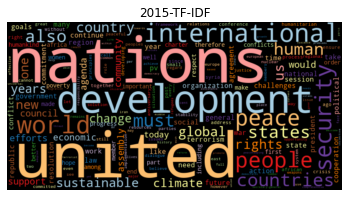

In [46]:
#연도별 불용어 제거 및 점수 비교

freq_1970 = count_words(un[un['year'] ==1970])
freq_2015 = count_words(un[un['year'] ==2015])

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']


#wordcloud(freq_df['freq'],title="All years", subplot)(1,3,1))

wordcloud(freq_1970['freq'], title='1970-TF',
          stopwords=['twenty-fiftj','twenty-five'])

wordcloud(freq_2015['freq'], title='2015-TF',
          stopwords=['seventieth'])

wordcloud(freq_1970['tfidf'], title='1970-TF-IDF',
          stopwords=['twenty-fiftj','twenty-five',"twenty","fifth"])

wordcloud(freq_2015['freq'], title='2015-TF-IDF',
          stopwords=['seventieth'])
